### **1. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error

### **2. Import Data Hasil Rules**

In [2]:
df = pd.read_csv('data/rules2023.csv')
df

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'HARMONY MELON', 'HARMONY LEMON', '...",frozenset({'HARMONY STRAWBERY'}),0.000113,1,1235.260000
1,1,"frozenset({'DELFI TOP TRIP/CHO 9GR', 'MOMOGI J...",frozenset({'MOMOGI CKL 6GR'}),0.000113,1,686.255556
2,2,"frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000113,1,571.879630
3,3,"frozenset({'CLOUD 9 VANILA 15 4G', 'INDOMILK K...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000146,1,571.879630
4,4,"frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000146,1,571.879630
5,5,"frozenset({'EKONOMI E900K', 'NUVO SOAP YLOW 72...",frozenset({'NUVO SOAP BLUE 72G'}),0.000113,1,388.446541
6,6,"frozenset({'INDOMILK STR 190ML BTL', 'INDOMILK...",frozenset({'INDOMILK KID VNL 115ML'}),0.000113,1,348.943503
7,7,"frozenset({'TONGTJI JASMINE 5 S', 'INDOMIE GRG...",frozenset({'INDOMIE AYAM SPECIAL'}),0.000113,1,284.622120
8,8,"frozenset({'KRIPIK SGKG TURBO 180G', 'TWISTER ...",frozenset({'OREO SOFT CAKE 16GR'}),0.000113,1,236.639847
9,9,"frozenset({'INDOMILK KID VNL 115ML', 'TEH GELA...",frozenset({'INDOMILK KID CKL 115ML'}),0.000162,1,183.818452


### **3. Ambil Top 3 Rules dengan Akurasi Tinggi**

In [3]:
df = df.head(3)
df

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'HARMONY MELON', 'HARMONY LEMON', '...",frozenset({'HARMONY STRAWBERY'}),0.000113,1,1235.260000
1,1,"frozenset({'DELFI TOP TRIP/CHO 9GR', 'MOMOGI J...",frozenset({'MOMOGI CKL 6GR'}),0.000113,1,686.255556
2,2,"frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",frozenset({'CLOUD 9 CHOCO 15 4G'}),0.000113,1,571.879630


### **4. Ambil Item dari Top 3**

In [4]:
# Jika df berasal dari subset sebelumnya, tambahkan .copy()
df = df.copy()

# Pastikan semua elemen dalam kolom antecedents dan consequents adalah frozenset
df["antecedents"] = df["antecedents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)
df["consequents"] = df["consequents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)

# Mengambil semua item unik
all_items = set()
for col in ["antecedents", "consequents"]:
    for items in df[col]:
        all_items.update(items)

all_items

{'CLOUD 9 CHOCO 15 4G',
 'CLOUD 9 VANILA 15 4G',
 'DELFI TOP TRIP/CHO 9GR',
 'HARMONY LEMON',
 'HARMONY MELON',
 'HARMONY ORANGE',
 'HARMONY STRAWBERY',
 'INDOMILK KID STR 115ML',
 'INDOMILK KID VNL 115ML',
 'MOMOGI CKL 6GR',
 'MOMOGI JGG BKR 6GR'}

### **5. Import Data Transaksi**

In [5]:
groceries = pd.read_excel('data/final_data2023.xlsx')
groceries

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
0,2023-01-01,2301011000001,FORVITA MARG 200GR,2
1,2023-01-01,2301011000002,SASA SANTAN KLPA 65ML,3
2,2023-01-01,2301011000003,CHEERS 1500ML GREEN,1
3,2023-01-01,2301011000004,SUN KARA 65ML,1
4,2023-01-01,2301011000004,OREO PIKACHU 165 6GR,1
...,...,...,...,...
162975,2023-12-31,2312311020112,KONIDIN 4 S,2
162976,2023-12-31,2312311020113,GOLDA CAPPUCINO 200ML,1
162977,2023-12-31,2312311020113,FLORIDINA ORANGE 360ML,1
162978,2023-12-31,2312311020114,WALLS PP TRICO/48,1


### **6. Filter Data Transaksi**

In [6]:
df_filtered = groceries[groceries['NAMA BARANG'].isin(all_items)]
df_filtered 

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
177,2023-01-01,2301011000075,INDOMILK KID STR 115ML,1
297,2023-01-01,2301011000108,MOMOGI CKL 6GR,2
324,2023-01-01,2301011000119,HARMONY ORANGE,1
325,2023-01-01,2301011000119,HARMONY LEMON,1
445,2023-01-01,2301011000157,HARMONY ORANGE,1
...,...,...,...,...
162382,2023-12-31,2312311010014,INDOMILK KID STR 115ML,1
162425,2023-12-31,2312311010032,INDOMILK KID STR 115ML,2
162562,2023-12-31,2312311010077,HARMONY STRAWBERY,4
162564,2023-12-31,2312311010077,HARMONY LEMON,2


In [7]:
# Menampilkan jumlah unik nama barang
jumlah_nama_barang = df_filtered['NAMA BARANG'].nunique()
print("Jumlah nama barang unik:", jumlah_nama_barang)

# Menampilkan isi nama barang yang unik
nama_barang_unik = df_filtered['NAMA BARANG'].unique()
print("Nama barang unik:")
for nama in nama_barang_unik:
    print("-", nama)

Jumlah nama barang unik: 11
Nama barang unik:
- INDOMILK KID STR 115ML
- MOMOGI CKL 6GR
- HARMONY ORANGE
- HARMONY LEMON
- MOMOGI JGG BKR 6GR
- HARMONY STRAWBERY
- DELFI TOP TRIP/CHO 9GR
- CLOUD 9 CHOCO 15 4G
- CLOUD 9 VANILA 15 4G
- HARMONY MELON
- INDOMILK KID VNL 115ML


### **7. Agregasi Data Mingguan**

In [8]:
# Agregasi jumlah QTY per tanggal dan nama barang
df_grouped = df_filtered.groupby(['TANGGAL', 'NAMA BARANG'], as_index=False)['QTY'].sum()

tanggal_range = pd.date_range(start='2023-01-01', end='2023-12-31')
all_items = df_filtered['NAMA BARANG'].unique()

# Buat kombinasi semua tanggal dan item
multi_index = pd.MultiIndex.from_product([tanggal_range, all_items], names=['TANGGAL', 'NAMA BARANG'])
all_combinations = pd.DataFrame(index=multi_index).reset_index()

# Gabungkan dengan hasil groupby
df_joined = pd.merge(all_combinations, df_grouped, on=['TANGGAL', 'NAMA BARANG'], how='left')
df_joined['QTY'] = df_joined['QTY'].fillna(0)

# Pastikan TANGGAL dalam datetime
df_joined['TANGGAL'] = pd.to_datetime(df_joined['TANGGAL'])

# Urutkan dulu datanya
df_joined = df_joined.sort_values('TANGGAL')

# Ambil tanggal paling awal
start_date = df_joined['TANGGAL'].min()

# Hitung minggu ke-n secara manual (tiap 7 hari)
df_joined['WEEK_NUMBER'] = ((df_joined['TANGGAL'] - start_date).dt.days // 7) + 1

# Agregasi berdasarkan minggu dan nama barang
df_weekly = df_joined.groupby(['WEEK_NUMBER', 'NAMA BARANG'], as_index=False)['QTY'].sum()

# (Opsional) Tambahkan kolom tanggal mulai minggu
df_weekly['TANGGAL'] = start_date + pd.to_timedelta((df_weekly['WEEK_NUMBER'] - 1) * 7, unit='D')

# Visualisasi
fig = px.line(df_weekly, x='TANGGAL', y='QTY', color='NAMA BARANG',
              title='Jumlah Penjualan per Minggu (Setiap 7 Hari)')
fig.update_layout(legend_title_text='Klik untuk tampilkan/sembunyikan item')
fig.show()

In [9]:
df_weekly

,WEEK_NUMBER,NAMA BARANG,QTY,TANGGAL
0,1,CLOUD 9 CHOCO 15 4G,0.0,2023-01-01
1,1,CLOUD 9 VANILA 15 4G,0.0,2023-01-01
2,1,DELFI TOP TRIP/CHO 9GR,0.0,2023-01-01
3,1,HARMONY LEMON,3.0,2023-01-01
4,1,HARMONY MELON,0.0,2023-01-01
...,...,...,...,...
578,53,HARMONY STRAWBERY,4.0,2023-12-31
579,53,INDOMILK KID STR 115ML,5.0,2023-12-31
580,53,INDOMILK KID VNL 115ML,3.0,2023-12-31
581,53,MOMOGI CKL 6GR,0.0,2023-12-31


### **8. Pivot Data**

In [10]:
df_weekly = df_weekly.pivot(index='TANGGAL', columns='NAMA BARANG', values='QTY')
df_weekly.columns.name = None  # hilangkan nama kolom atas
df_weekly = df_weekly.reset_index() 
df_weekly.head()

,TANGGAL,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,DELFI TOP TRIP/CHO 9GR,HARMONY LEMON,HARMONY MELON,HARMONY ORANGE,HARMONY STRAWBERY,INDOMILK KID STR 115ML,INDOMILK KID VNL 115ML,MOMOGI CKL 6GR,MOMOGI JGG BKR 6GR
0,2023-01-01,0.0,0.0,0.0,3.0,0.0,3.0,1.0,13.0,0.0,7.0,9.0
1,2023-01-08,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,4.0
2,2023-01-15,0.0,0.0,4.0,3.0,0.0,0.0,1.0,8.0,0.0,3.0,3.0
3,2023-01-22,0.0,0.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,2.0,9.0
4,2023-01-29,5.0,6.0,7.0,1.0,0.0,4.0,1.0,11.0,0.0,18.0,12.0


In [11]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TANGGAL                 53 non-null     datetime64[ns]
 1   CLOUD 9 CHOCO 15 4G     53 non-null     float64       
 2   CLOUD 9 VANILA 15 4G    53 non-null     float64       
 3   DELFI TOP TRIP/CHO 9GR  53 non-null     float64       
 4   HARMONY LEMON           53 non-null     float64       
 5   HARMONY MELON           53 non-null     float64       
 6   HARMONY ORANGE          53 non-null     float64       
 7   HARMONY STRAWBERY       53 non-null     float64       
 8   INDOMILK KID STR 115ML  53 non-null     float64       
 9   INDOMILK KID VNL 115ML  53 non-null     float64       
 10  MOMOGI CKL 6GR          53 non-null     float64       
 11  MOMOGI JGG BKR 6GR      53 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 5.1 

In [12]:
# Pastikan TANGGAL diubah ke tipe datetime
df_weekly["TANGGAL"] = pd.to_datetime(df_weekly["TANGGAL"])

# Set kolom TANGGAL sebagai index
df_weekly.set_index("TANGGAL", inplace=True)

# Resample data untuk frekuensi mingguan (W-SUN), menjadikan setiap minggu sebagai satu data point
df_weekly = df_weekly.resample('W-SUN').sum()  # Anda bisa menggunakan metode lain seperti mean() jika perlu

# Tampilkan hasil
df_weekly.head(3)

,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,DELFI TOP TRIP/CHO 9GR,HARMONY LEMON,HARMONY MELON,HARMONY ORANGE,HARMONY STRAWBERY,INDOMILK KID STR 115ML,INDOMILK KID VNL 115ML,MOMOGI CKL 6GR,MOMOGI JGG BKR 6GR
TANGGAL,,,,,,,,,,,
2023-01-01,0.0,0.0,0.0,3.0,0.0,3.0,1.0,13.0,0.0,7.0,9.0
2023-01-08,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,4.0
2023-01-15,0.0,0.0,4.0,3.0,0.0,0.0,1.0,8.0,0.0,3.0,3.0


### **9. Cek Stasioneritas dengan ADF Test dan ACF PACF**

In [13]:
def check_stationarity(series, name):
    print(f"\n=== {name} ===")

    # ADF Test
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")

    # # Tentukan maksimal lag aman
    # max_lags = min(30, len(series.dropna()) // 2 - 1)

    # # Plot ACF & PACF
    # fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    # plot_acf(series.dropna(), ax=axes[0], lags=max_lags)
    # plot_pacf(series.dropna(), ax=axes[1], lags=max_lags, method='ywm')
    # axes[0].set_title(f'ACF - {name}')
    # axes[1].set_title(f'PACF - {name}')
    # plt.tight_layout()
    # plt.show()

# Jalankan untuk tiap kolom
for col in df_weekly.columns:
    check_stationarity(df_weekly[col], col)



=== CLOUD 9 CHOCO 15 4G ===
ADF Statistic: -4.80763257076568
p-value: 5.25866956549481e-05
Stationary

=== CLOUD 9 VANILA 15 4G ===
ADF Statistic: -3.42054427926055
p-value: 0.01027814061589036
Stationary

=== DELFI TOP TRIP/CHO 9GR ===
ADF Statistic: -4.463621974285861
p-value: 0.0002286439313039586
Stationary

=== HARMONY LEMON ===
ADF Statistic: -6.0015820872650725
p-value: 1.65249096477773e-07
Stationary

=== HARMONY MELON ===
ADF Statistic: -6.064935180823813
p-value: 1.1880129573285605e-07
Stationary

=== HARMONY ORANGE ===
ADF Statistic: -1.8612106849631707
p-value: 0.35052294898030106
Non-stationary

=== HARMONY STRAWBERY ===
ADF Statistic: -6.487317511561381
p-value: 1.2515159124723137e-08
Stationary

=== INDOMILK KID STR 115ML ===
ADF Statistic: -5.176817291083101
p-value: 9.802549088762738e-06
Stationary

=== INDOMILK KID VNL 115ML ===
ADF Statistic: -1.6050422161306381
p-value: 0.48106014796660956
Non-stationary

=== MOMOGI CKL 6GR ===
ADF Statistic: -4.799502467294877
p-v

### **10. Differencing Data Tidak Stasioner**

In [14]:
df_diff = df_weekly.diff().dropna()  # differencing 1x

In [15]:
# 1. Differencing data sekali
# df_diff = df_weekly.diff().dropna()

# 2. Tes stasioneritas menggunakan ADF
def check_stationarity_after_diff(series, name):
    # Tes ADF
    adf_result = adfuller(series)
    print(f"Hasil ADF Test untuk {name}:")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"P-value: {adf_result[1]}")
    print("Stationary" if adf_result[1] < 0.05 else "Non-stationary")
    
    # # Tentukan maksimal lag aman
    # max_lags = min(30, len(series.dropna()) // 2 - 1)

    # # 3. Plot ACF dan PACF
    # fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    # plot_acf(series, ax=axes[0], lags=max_lags)
    # plot_pacf(series, ax=axes[1], lags=max_lags)
    # axes[0].set_title(f'ACF - {name}')
    # axes[1].set_title(f'PACF - {name}')
    # plt.show()

# 4. Cek stasioneritas untuk setiap kolom setelah differencing
for col in df_diff.columns:
    check_stationarity_after_diff(df_diff[col], col)


Hasil ADF Test untuk CLOUD 9 CHOCO 15 4G:
ADF Statistic: -7.134101129376743
P-value: 3.4568527299634074e-10
Stationary
Hasil ADF Test untuk CLOUD 9 VANILA 15 4G:
ADF Statistic: -12.84624370379226
P-value: 5.4725421757578004e-24
Stationary
Hasil ADF Test untuk DELFI TOP TRIP/CHO 9GR:
ADF Statistic: -5.178090255111871
P-value: 9.744261355940833e-06
Stationary
Hasil ADF Test untuk HARMONY LEMON:
ADF Statistic: -7.1307653752514515
P-value: 3.522731203998819e-10
Stationary
Hasil ADF Test untuk HARMONY MELON:
ADF Statistic: -6.15895848056741
P-value: 7.252218595474505e-08
Stationary
Hasil ADF Test untuk HARMONY ORANGE:
ADF Statistic: -7.797913481700126
P-value: 7.629647492884273e-12
Stationary
Hasil ADF Test untuk HARMONY STRAWBERY:
ADF Statistic: -3.327173772134258
P-value: 0.013706649182495978
Stationary
Hasil ADF Test untuk INDOMILK KID STR 115ML:
ADF Statistic: -6.247475057468659
P-value: 4.538711522958169e-08
Stationary
Hasil ADF Test untuk INDOMILK KID VNL 115ML:
ADF Statistic: -15.332

### **11. Pemilihan Lag**

In [16]:
model = VAR(df_diff)
lag_order_results = model.select_order(maxlags=1)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       26.04      26.46*   2.036e+11      26.20*
1      25.01*       30.01  8.025e+10*       26.92
-------------------------------------------------


In [17]:
optimal_lag = lag_order_results.aic
print(f"Optimal Lag: {optimal_lag}")

Optimal Lag: 1


### **12. Spliting Data**

In [18]:
# Tentukan rasio training dan testing 
train_size = int(len(df_diff) * 0.7)
train_data, test_data = df_diff[:train_size], df_diff[train_size:]

### **13. Pemodelan dengan Data Train dan Menggunakan Estimasi Parameter OLS**

In [19]:
# Fit model VAR pada training data
model = VAR(train_data)
var_model = model.fit(optimal_lag)

In [20]:
# Lakukan forecasting pada data testing
forecast_steps = len(test_data)  # Langkah forecast sesuai jumlah data testing
forecast_values = var_model.forecast(train_data.values[optimal_lag:], steps=forecast_steps)

# Konversi hasil prediksi ke dalam dataframe
forecast_df = pd.DataFrame(forecast_values, columns=df_diff.columns, index=test_data.index)

### **14. Evaluasi Model**

In [21]:
# Hitung MSE, RMSE, MAE, dan R2 untuk setiap kolom
mse = mean_squared_error(test_data, forecast_df)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast_df)
non_zero_mask = test_data != 0  # Membuat mask untuk data yang bukan nol
mape = np.mean(np.abs((test_data[non_zero_mask] - forecast_df[non_zero_mask]) / test_data[non_zero_mask])) * 100


# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Squared Error (MSE): 30.30438838370642
Root Mean Squared Error (RMSE): 5.504942178052956
Mean Absolute Error (MAE): 3.927591524880569
Mean Absolute Percentage Error (MAPE): 111.85741068937558%


### **15. Visualisasi Data Forecast vs Asli**

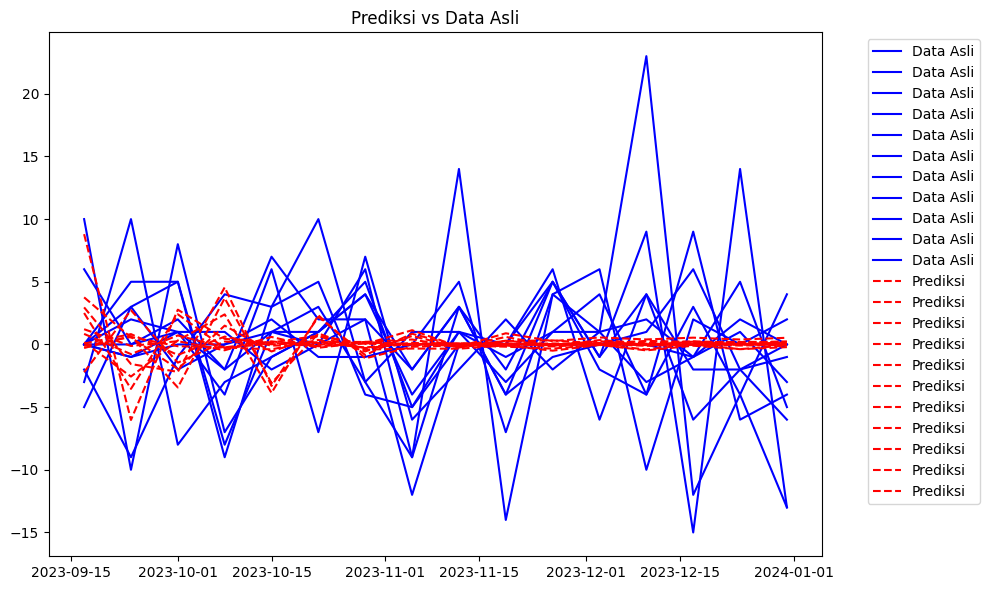

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Data Asli', color='blue')
plt.plot(forecast_df.index, forecast_df, label='Prediksi', color='red', linestyle='--')
plt.title('Prediksi vs Data Asli')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

In [23]:
# Langkah 1: Forecast ke depan berdasarkan model VAR yang sudah dilatih
selected_lag = optimal_lag  # Ganti sesuai dengan lag VAR yang kamu pakai
n_forecast = 4   # Ganti jumlah minggu yang ingin kamu forecast ke depan

# Ambil data terakhir dari train_data untuk input ke forecasting
last_train_values = train_data.values[-selected_lag:]
forecast_diff = var_model.forecast(y=last_train_values, steps=n_forecast)

# Langkah 2: Forecast dan buat index tanggal ke depan
df_weekly.index = pd.to_datetime(df_weekly.index)
last_date = df_weekly.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=n_forecast, freq='W')

# Buat dataframe forecast dengan index yang benar
forecast_diff_df = pd.DataFrame(forecast_diff, columns=df_diff.columns, index=forecast_index)

# Langkah 3: Inverse differencing untuk mengembalikan ke nilai asli
# Ambil baris terakhir dari data asli sebelum differencing
last_actual = df_weekly.iloc[-1]  # Ini penting untuk starting point inverse

# Invers dengan penjumlahan kumulatif + last actual
forecast_original_df = forecast_diff_df.cumsum() + last_actual
forecast_original_df = forecast_original_df.fillna(0).round().astype(int)  
forecast_original_df


,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,DELFI TOP TRIP/CHO 9GR,HARMONY LEMON,HARMONY MELON,HARMONY ORANGE,HARMONY STRAWBERY,INDOMILK KID STR 115ML,INDOMILK KID VNL 115ML,MOMOGI CKL 6GR,MOMOGI JGG BKR 6GR
2024-01-07,5,4,1,0,5,0,4,8,12,0,0
2024-01-14,5,0,0,3,5,1,4,6,6,0,-2
2024-01-21,3,2,1,1,5,0,4,4,9,-3,-2
2024-01-28,5,2,1,1,5,1,4,9,9,1,0
